전자상거래 세션 데이터와 부가적인 데이터로 고객의 거래 여부를 추측하고자 한다. 이는, 전자 상거래 페이지 로직을 개선하는 데 있어 도움이 되는 정보를 도출할 수 있다.
출처는 다음과 같다.
1. C. Okan Sakar Department of Computer Engineering, Faculty of Engineering and Natural Sciences, Bahcesehir University, 34349 Besiktas, Istanbul, Turkey
2. Yomi Kastro Inveon Information Technologies Consultancy and Trade, 34335 Istanbul, Turkey

데이터 크기는 12330개의 records, 10개의 수치형 attributes, 8개의 범주형 attributes로 구성되어 있다.

attribute에 대한 설명은 다음과 같다.

Administrative: 계정 설정 관련 페이지 방문 횟수

Administrative_Duration: 계정 설정 관련 페이지에 머문 시간(초)

Informational: 해당 전자상거래 사이트의 이용이나 주소 관련 정보를 포함한 페이지 방문 횟수

Informational_Duration: 해당 전자상거래 사이트 관련 정보를 포함한 페이지 방문 횟수

ProductRelated: 제품 관련 페이지를 방문한 횟수

ProductRelated_Duration: 제품 관련 페이지에 머문 시간(초)

BounceRates: 해당 페이지에서 사이트에 들어갔다가 아무것도 안 하고 나오는 고객의 비율

ExitRates: 해당 페이지가 해당 세션에서 보는 마지막 페이지인 비율

PageValues: 전자상거래 완료 전의 해당 페이지 방문 횟수의 평균

SpecialDay: 기념일(엄마의 날, 발렌타인 데이 등)에 가까운 정도. 기념일에 가까울수록 거래가 성사될 확률이 높다.

Month: 방문 월(1-12)

OperatingSystems: 방문자가 사용하는 운영체제(1-8)

Browser: 방문자가 사용하는 브라우저(1-13)

Region	: 방문자가 세션을 시작한 지리적 위치(1-9)

TrafficType: 방문자가 어떤 경로로 사이트에 들어왔는지(banner, SMS, direct...)

VisitorType: “New Visitor”, “Returning Visitor”, and “Other”

Weekend: TRUE/FALSE

Revenue: 거래를 하였는지 TRUE/FALSE


위의 attributes 중 Revenue를 class label로 하는 분류기를 만들고자 한다.


In [ ]:
import pandas as pd
#데이터 불러오기
data = pd.read_csv("/content/drive/My Drive/데이터 마이닝/online_shoppers_intention.csv")
#데이터 instance 개수, attribute 구성, attribute별 데이터 타입 보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

attributes에 대한 설명을 읽어보면, 'Month'이후attributes는 categorical data라는 것을 알 수 있다. 따라서, numerical data의 통계량만을 보고자 다음과 같이 했다.

In [ ]:
numerical = data.columns[:10]
DF=data[numerical]
통계량 = DF.describe()
#한 페이지에 내용 들어올 수 있게 출력
for i in range(0, len(통계량.columns), 3):
  if i+3 > len(통계량.columns):
    print(통계량.iloc[:, i:])
  else:
    print(통계량.iloc[:,i:i+3], '\n')

       Administrative  Administrative_Duration  Informational
count    12330.000000             12330.000000   12330.000000
mean         2.315166                80.818611       0.503569
std          3.321784               176.779107       1.270156
min          0.000000                 0.000000       0.000000
25%          0.000000                 0.000000       0.000000
50%          1.000000                 7.500000       0.000000
75%          4.000000                93.256250       0.000000
max         27.000000              3398.750000      24.000000 

       Informational_Duration  ProductRelated  ProductRelated_Duration
count            12330.000000    12330.000000             12330.000000
mean                34.472398       31.731468              1194.746220
std                140.749294       44.475503              1913.669288
min                  0.000000        0.000000                 0.000000
25%                  0.000000        7.000000               184.137500
50%           

numerical data의 히스토그램도 그려보았다.

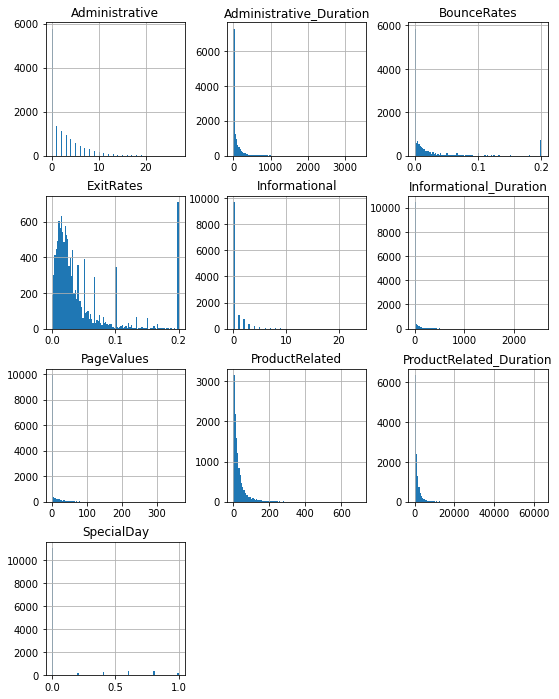

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
DF.hist(bins=100, figsize = (9, 12), layout = (4, 3));

전체적으로 0값을 가진 데이터 수의 비율이 크다. ExitRate와 SpecialDay를 제외하고는, 값이 클 수록 개수가 적다. Administrative와 Administrative_Duration, Informational과 Informational_Duration, ProductRelated와 ProductRelated_Duration끼리 관련이 있다고 생각되어 correlation matrix를 각각 만들어보았다.

In [ ]:
data[['Administrative', 'Administrative_Duration']].corr()

,Administrative,Administrative_Duration
Administrative,1.000000,0.601583
Administrative_Duration,0.601583,1.000000


In [ ]:
data[['Informational', 'Informational_Duration']].corr()

,Informational,Informational_Duration
Informational,1.000000,0.618955
Informational_Duration,0.618955,1.000000


In [ ]:
data[['ProductRelated', 'ProductRelated_Duration']].corr()

,ProductRelated,ProductRelated_Duration
ProductRelated,1.000000,0.860927
ProductRelated_Duration,0.860927,1.000000


다른 쌍들에 비해 ProductRelated와 ProductRelated_Duration간에는 큰 상관관계가 있어, 이후 모델을 만들 때, 둘 중 한 변수는 제거하려 한다.

그리고, SpecialDay와 Month도 상관관계가 있을거라 생각하였다. SpecialDay값들이 이산형이기도 하고 그래서, 각 SpecialDay값 별로 Month가 어떤지 확인하였다.


In [ ]:
pd.set_option('display.max_colwidth', None)
data[['SpecialDay', 'Month']].groupby('SpecialDay').agg(['unique'])

,Month
,unique
SpecialDay,
0.0,"[Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec]"
0.2,"[Feb, May]"
0.4,"[Feb, May]"
0.6,"[Feb, May]"
0.8,"[Feb, May]"
1.0,"[Feb, May]"


놀랍게도, 특별한날에 가까운 달들은 전부 2월과 5월이었다. 특별한날과의 가까운 정도가 0인 달들에도 2월과 5월이 포함되어있었고, 1월과 4월은 데이터에 없었다. 따라서, Month attribute없이 SpecialDay attibute만 있어도 된다고 생각하였다.

다음은 categorical data를 살펴보았다. OperatingSystems, Browser, Region, TrafficType은 nominal data임에도 불구하고 정수로써 표현되어 있어서 순위가 생겨, 예측값에 안좋은 영향을 줄 수 있으나, 제안서에서, 중점적으로 다뤄보겠다고 한 알고리즘이 logistic regression과 naive bayes classifier이기 때문에, 숫자 크기에는 상관이 없을것으로 예상된다. VisitorType은 문자로 표현된 값들이어서, 모델이 계산을 할 수 없다. 따라서 이 attributes값들은 1, 2, 3으로 값을 대체해줄 것이다.

In [ ]:
#object type인 VisitorType을 숫자형으로 변환해주기
for i in range(len(data['VisitorType'])):
  if data['VisitorType'][i]=='Returning_Visitor':
    data['VisitorType'][i]=1
  elif data['VisitorType'][i]=='New_Visitor':
    data['VisitorType'][i]=2
  else: data['VisitorType'][i]=3
data['VisitorType']=pd.to_numeric(data['VisitorType'], errors='coerce')
#categorical attributes를 수치형 데이터만 모아놓은 데이터프레임에 추가
for i in data.columns[11:17]:
  DF[i]=data[i].values

다음으로, class label인 Revenue를 살펴볼 것이다.

In [ ]:
data['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

True값을 예측하는 것이 중요한데, False data가 상당히 많은 imbalanced data인 것을 알 수 있다. 따라서, 모델을 학습할 때, True data 70%와, 그 개수과 똑같은 False data를 sampling하여 input을 줄 것이다. 이후, 모델들을 비교할 땐 True data에서 training data를 뺀 30%의 True data와, false data 전체를 분류하게 하고 F-measure를 사용하여 비교할 것이다.

전자상거래 이용객이 어떤 상황과 경로를 택했을 때, 결국 거래를 할 것인가를 예측할 건데, 이를 위해 logistic regression과 naive bayes classification을 이용할 것이다.

이 데이터셋을 가지고 연구한 한 논문(Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018))은, 두 가지 모듈을 가진, 전자상거래 이용객이 쇼핑을 할지 안 할지 예측하는, 시스템을 제안했다. 첫 번째 모듈은, attribute값들과 두 번째 모듈의 feedback을 기반으로, 고객의 거래 의도에 대한 점수를 냈다. 사용한 알고리즘은, random forest, support vector machines, multilayer perceptron classifiers이다. oversampling과 feature selection도 이루어졌다. 두 번째 모듈은 고객이 그 사이트를 나갈건지 예측하는 것이다. 두 번째 모듈에서 특정 값 이상을 넘은 값이 반환되었을 때에만 첫 번째 모듈을 실행하였다. 두 번째 모듈은 고객의 웹페이지 방문 경로 패턴에 따라 고객이 특정 기간에 사이트를 벗어날 지 예측하기 위해 long short-term memory recurrent neural network을 사용하였다. 이들이 oversampling을 할 때, 30%의 True data를 test data로 남겨두었다. 이들이 만든 모델의 F1 score는 전부 81%이상이었고, 최댓값인 86%는 hidden layer가 10개인 multilayer perceptron에서 나왔다.

In [ ]:
from sklearn.model_selection import train_test_split
#data를 True data와 False data로 나누었다.
DF['Revenue']=data['Revenue'].values
revenueT = DF[DF['Revenue']==True]
revenueF = DF[DF['Revenue']==False]
#True data에서 30%를 test data 용으로 뺐다.
trainT, testT = train_test_split(revenueT, test_size = 0.3)
#False data를 학습용 True data의 크기와 같거나 비슷하게 나누었다.
trainF=[]
former=0
for i in range(len(trainT), len(revenueF), len(trainT)):
  if former + len(trainT) > len(revenueF):
    trainF.append(revenueF[former:])
  else:
    trainF.append(revenueF[former:i])
  former = i
#전체적인 train과 test의 분리(undersampling 안 한 data)
train_data, test_data, train_target, test_target = train_test_split(DF, data['Revenue'])

# Logistic Regression
아쉽게도 잘 알려진 파이썬 함수 중에 logistic regression을 partial fitting 할 수 있는 게 없었다. 따라서, undersampling을 하지 않은 data를 가지고 model을 만들어보고자 한다.

1. undersampling을 하지 않은 data
2. ProductRelated attribute를 drop한 data
3. ProductRelated_Duration attribute를 drop한 data

undersampling을 하지 않은 data

In [ ]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(penalty='elasticnet', tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=0, solver='saga', max_iter=10000, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=0.5).fit(train_data, train_target)
from sklearn.metrics import f1_score
f1_score(test_target, LG.predict(test_data))

0.48076923076923084

ProductRelated attribute를 drop한 data

In [ ]:
withoutP = list(train_data.columns)
withoutP.remove('ProductRelated')
LGP = LogisticRegression(penalty='elasticnet', tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=0, solver='saga', max_iter=10000, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=0.5).fit(train_data[withoutP], train_target)
f1_score(test_target, LGP.predict(test_data[withoutP]))

0.48648648648648646

ProductRelated_Duration attribute를 drop한 data

In [ ]:
withoutPD = list(train_data.columns)
withoutPD.remove('ProductRelated_Duration')
LGPD = LogisticRegression(penalty='elasticnet', tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=0, solver='saga', max_iter=10000, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=0.5).fit(train_data[withoutPD], train_target)
f1_score(test_target, LGPD.predict(test_data[withoutPD]))

0.5900783289817232

# Naive Bayes classifier
scikit learn 에서 제공하는 함수 중 imbalanced data에 적용하기 좋은 함수로 complement naive bayes가 있다. 그래서 이것을 다음과 같은 data에 사용해보고자 한다.

1.   undersampling을 하지 않은 data
2.   undersampling을 한 data
3.   ProductRelated attribute를 drop한 data
4.   ProductRelated_Duration attribute를 drop한 data

undersampling을 하지 않은 data

In [ ]:
from sklearn.naive_bayes import ComplementNB
NB_noSample = ComplementNB(alpha=0, fit_prior=False).fit(train_data, train_target)
f1_score(test_target, NB_noSample.predict(test_data))# = 0.7613240418118468

undersampling을 한 data

In [ ]:
NB = ComplementNB(alpha=0, fit_prior=False)
for d in trainF:
  tt = pd.concat([d, trainT], axis=0).sample(frac=1)
  train = tt.loc[:, :'Weekend']
  target = tt.loc[:, 'Revenue']
  NB.partial_fit(train, target, classes=[True, False])

data4metric = pd.concat([testT, revenueT], axis=0).sample(frac=1)
y_true = data4metric.loc[:, 'Revenue']
y_pred = NB.predict(data4metric.loc[:, :'Weekend'])
f1_score(y_true, y_pred)# = 0.7699553792761528

False data도 따로 빼고 test해 보았다.

In [ ]:
NBwithFalseTest = ComplementNB(alpha=0, fit_prior=False)
for d in trainF[:-1]:
  tt = pd.concat([d, trainT], axis=0).sample(frac=1)
  train = tt.loc[:, :'Weekend']
  target = tt.loc[:, 'Revenue']
  NBwithFalseTest.partial_fit(train, target, classes=[True, False])

data4metric = pd.concat([testT, trainF[-1]], axis=0).sample(frac=1)
y_true = data4metric.loc[:, 'Revenue']
y_pred = NBwithFalseTest.predict(data4metric.loc[:, :'Weekend'])
f1_score(y_true, y_pred)# = 0.6798866855524079

조금 충격적이다. 이제 다시 보니, f1 score가 false data의 비율과 유사했다. 이후 data에서는 False data도 test용을 따로 뺀 data를 쓰겠다.

ProductRelated attribute를 drop한 data

In [ ]:
NBwithoutP = ComplementNB(alpha=0, fit_prior=False)
withoutP = list(trainT.columns)
withoutP.remove('ProductRelated')
for d in trainF[:-1]:
  tt = pd.concat([d[withoutP], trainT[withoutP]], axis=0).sample(frac=1)
  train = tt.loc[:, :'Weekend']
  target = tt.loc[:, 'Revenue']
  NBwithoutP.partial_fit(train, target, classes=[True, False])

data4metric = pd.concat([testT, trainF[-1]], axis=0).sample(frac=1)
y_true = data4metric[withoutP].loc[:, 'Revenue']
y_pred = NBwithoutP.predict(data4metric[withoutP].loc[:, :'Weekend'])
f1_score(y_true, y_pred)# = 0.6829268292682927

ProductRelated_Duration attribute를 drop한 data

In [ ]:
NBwithoutPD = ComplementNB(alpha=0, fit_prior=False)
withoutPD = list(trainT.columns)
withoutPD.remove('ProductRelated_Duration')
for d in trainF[:-1]:
  tt = pd.concat([d[withoutPD], trainT[withoutPD]], axis=0).sample(frac=1)
  train = tt.loc[:, :'Weekend']
  target = tt.loc[:, 'Revenue']
  NBwithoutP.partial_fit(train, target, classes=[True, False])

data4metric = pd.concat([testT, trainF[-1]], axis=0).sample(frac=1)
y_true = data4metric[withoutPD].loc[:, 'Revenue']
y_pred = NBwithoutP.predict(data4metric[withoutPD].loc[:, :'Weekend'])
f1_score(y_true, y_pred)# = 0.6851338873499538

categorical data가 포함 된 data에 대해 모델링 할 때에는, 어떤 값이 그 data에 얼마나 많이 나오는 지 확률을 보고 classification하는 것이, 그렇지 않은 것 보다 좀 더 수월하다는 것을 느꼈다. 왜냐하면, 값의 크기가 모델에 영향을 주지 않으려면, encoding을 하는 방법이 있는데, encoding된 vector를 모델이 계산 할 수 없다. 그리고, imbalanced data에서 중요한 class가 적은 경우, 이를 예측하는 것이 상당히 까다롭다는 것을 느꼈다. 이후, ensemble methods를 사용하거나 Artifitial Neural Network를 사용해봐도 좋을 것 같다. 미처 알아내지 못한 다중공선성도 어쩌면 존재할지도 모른다는 생각이 든다. 또한, 0값이 많았는데, 0값을 많이 가진 행들을 제거하고 모델을 구축해보는 것도 좋을 것 같다.